In [17]:
import meep as mp
from meep.materials import fused_quartz
import numpy as np
import math
import matplotlib.pyplot as plt

resolution = 800  # pixels/μm

dpml = 1.0
sz = 10 + 2 * dpml
cell_size = mp.Vector3(z=sz)
pml_layers = [mp.PML(dpml)]

wvl_min = 0.4
wvl_max = 0.8
fmin = 1 / wvl_max
fmax = 1 / wvl_min
fcen = 0.5 * (fmax + fmin)
df = fmax - fmin
nfreq = 50

sources = [
    mp.Source(
        mp.GaussianSource(fcen, fwidth=df),
        component=mp.Ex,
        center=mp.Vector3(z=-0.5 * sz + dpml),
    )
]

sim = mp.Simulation(
    cell_size=cell_size,
    boundary_layers=pml_layers,
    sources=sources,
    dimensions=1,
    resolution=resolution,
)

refl_fr = mp.FluxRegion(center=mp.Vector3(z=-0.25 * sz))
refl = sim.add_flux(fcen, df, nfreq, refl_fr)

sim.run(until_after_sources=mp.stop_when_fields_decayed(50, mp.Ex, mp.Vector3(), 1e-9))

empty_flux = mp.get_fluxes(refl)
empty_data = sim.get_flux_data(refl)
sim.reset_meep()

geometry = [
    mp.Block(
        mp.Vector3(mp.inf, mp.inf, 0.5 * sz),
        center=mp.Vector3(z=0.25 * sz),
        material=fused_quartz,
    )
]

sim = mp.Simulation(
    cell_size=cell_size,
    boundary_layers=pml_layers,
    geometry=geometry,
    sources=sources,
    dimensions=1,
    resolution=resolution,
)

refl = sim.add_flux(fcen, df, nfreq, refl_fr)
sim.load_minus_flux_data(refl, empty_data)

sim.run(until_after_sources=mp.stop_when_fields_decayed(50, mp.Ex, mp.Vector3(), 1e-9))

refl_flux = mp.get_fluxes(refl)
R_meep = -1 * np.divide(refl_flux, empty_flux)

-----------
Initializing structure...
time for choose_chunkdivision = 0.000246048 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 12 with resolution 800
time for set_epsilon = 0.00113297 s
-----------
field decay(t = 50.000625): 0.25001009367639876 / 0.25001009367639876 = 1.0
field decay(t = 100.00125): 1.1807599226012803e-16 / 0.25001009367639876 = 4.722849006766903e-16
run 0 finished at t = 100.00125 (160002 timesteps)
-----------
Initializing structure...
time for choose_chunkdivision = 0.000221014 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 12 with resolution 800
     block, center = (0,0,3)
          size (1e+20,1e+20,6)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
time for set_epsilon = 0.00165391 s
lorentzian susceptibility: frequency=0.101049, gamma=0
lorentzian susceptibility: frequency=8.60279, gamma=0
lorentzian susceptibility: frequency=14.619, gamma=0
-----------
field decay(t = 50.000625): 0.1651

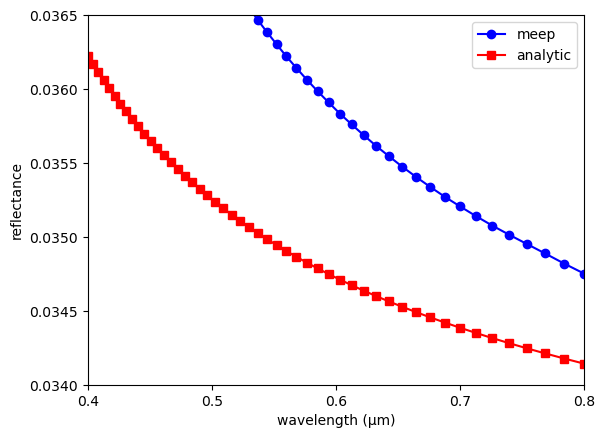

In [6]:
freqs = mp.get_flux_freqs(refl)
wvls = np.divide(1, freqs)

eps_quartz = (
    lambda l: 1
    + 0.6961663 * math.pow(l, 2) / (pow(l, 2) - pow(0.0684043, 2))
    + 0.4079426 * pow(l, 2) / (pow(l, 2) - pow(0.1162414, 2))
    + 0.8974794 * pow(l, 2) / (pow(l, 2) - pow(9.896161, 2))
)
R_fresnel = lambda l: math.pow(
    math.fabs(1 - math.sqrt(eps_quartz(l))) / (1 + math.sqrt(eps_quartz(l))), 2
)
R_analytic = [R_fresnel(i) for i in wvls]

plt.figure()
plt.plot(wvls, R_meep, "bo-", label="meep")
plt.plot(wvls, R_analytic, "rs-", label="analytic")
plt.xlabel("wavelength (μm)")
plt.ylabel("reflectance")
plt.axis([0.4, 0.8, 0.0340, 0.0365])
plt.xticks([t for t in np.arange(0.4, 0.9, 0.1)])
plt.legend(loc="upper right")
plt.show()

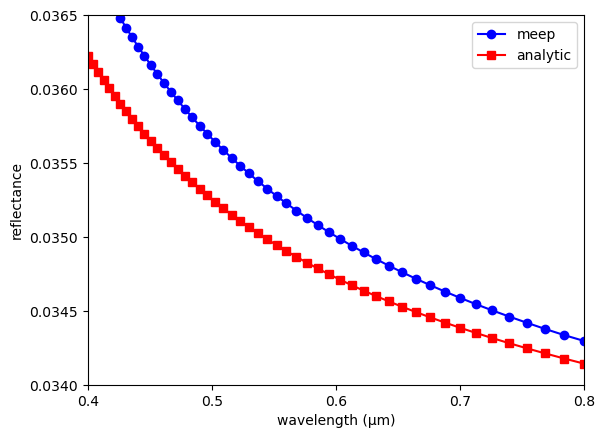

In [4]:
freqs = mp.get_flux_freqs(refl)
wvls = np.divide(1, freqs)

eps_quartz = (
    lambda l: 1
    + 0.6961663 * math.pow(l, 2) / (pow(l, 2) - pow(0.0684043, 2))
    + 0.4079426 * pow(l, 2) / (pow(l, 2) - pow(0.1162414, 2))
    + 0.8974794 * pow(l, 2) / (pow(l, 2) - pow(9.896161, 2))
)
R_fresnel = lambda l: math.pow(
    math.fabs(1 - math.sqrt(eps_quartz(l))) / (1 + math.sqrt(eps_quartz(l))), 2
)
R_analytic = [R_fresnel(i) for i in wvls]

plt.figure()
plt.plot(wvls, R_meep, "bo-", label="meep")
plt.plot(wvls, R_analytic, "rs-", label="analytic")
plt.xlabel("wavelength (μm)")
plt.ylabel("reflectance")
plt.axis([0.4, 0.8, 0.0340, 0.0365])
plt.xticks([t for t in np.arange(0.4, 0.9, 0.1)])
plt.legend(loc="upper right")
plt.show()

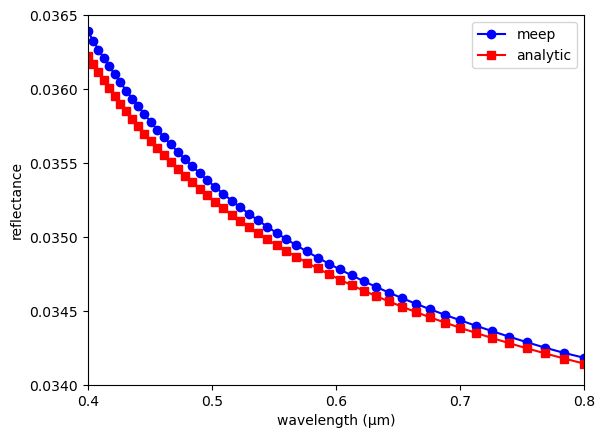

In [2]:
freqs = mp.get_flux_freqs(refl)
wvls = np.divide(1, freqs)

eps_quartz = (
    lambda l: 1
    + 0.6961663 * math.pow(l, 2) / (pow(l, 2) - pow(0.0684043, 2))
    + 0.4079426 * pow(l, 2) / (pow(l, 2) - pow(0.1162414, 2))
    + 0.8974794 * pow(l, 2) / (pow(l, 2) - pow(9.896161, 2))
)
R_fresnel = lambda l: math.pow(
    math.fabs(1 - math.sqrt(eps_quartz(l))) / (1 + math.sqrt(eps_quartz(l))), 2
)
R_analytic = [R_fresnel(i) for i in wvls]

plt.figure()
plt.plot(wvls, R_meep, "bo-", label="meep")
plt.plot(wvls, R_analytic, "rs-", label="analytic")
plt.xlabel("wavelength (μm)")
plt.ylabel("reflectance")
plt.axis([0.4, 0.8, 0.0340, 0.0365])
plt.xticks([t for t in np.arange(0.4, 0.9, 0.1)])
plt.legend(loc="upper right")
plt.show()

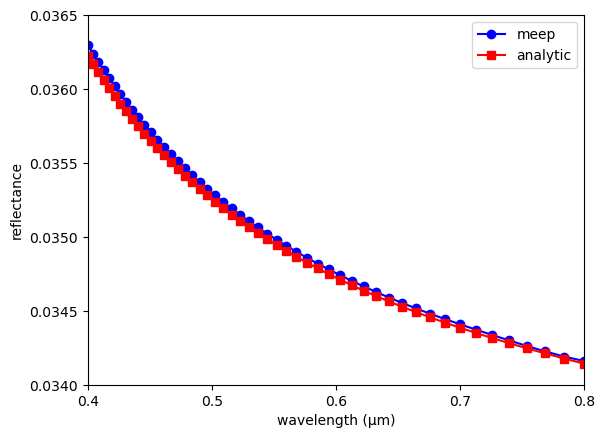

In [8]:
freqs = mp.get_flux_freqs(refl)
wvls = np.divide(1, freqs)

eps_quartz = (
    lambda l: 1
    + 0.6961663 * math.pow(l, 2) / (pow(l, 2) - pow(0.0684043, 2))
    + 0.4079426 * pow(l, 2) / (pow(l, 2) - pow(0.1162414, 2))
    + 0.8974794 * pow(l, 2) / (pow(l, 2) - pow(9.896161, 2))
)
R_fresnel = lambda l: math.pow(
    math.fabs(1 - math.sqrt(eps_quartz(l))) / (1 + math.sqrt(eps_quartz(l))), 2
)
R_analytic = [R_fresnel(i) for i in wvls]

plt.figure()
plt.plot(wvls, R_meep, "bo-", label="meep")
plt.plot(wvls, R_analytic, "rs-", label="analytic")
plt.xlabel("wavelength (μm)")
plt.ylabel("reflectance")
plt.axis([0.4, 0.8, 0.0340, 0.0365])
plt.xticks([t for t in np.arange(0.4, 0.9, 0.1)])
plt.legend(loc="upper right")
plt.show()

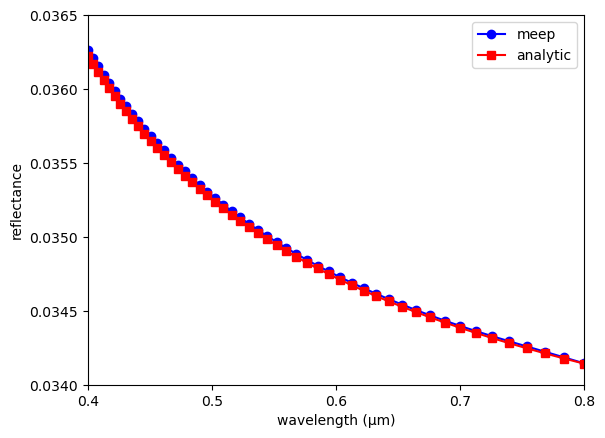

In [10]:
freqs = mp.get_flux_freqs(refl)
wvls = np.divide(1, freqs)

eps_quartz = (
    lambda l: 1
    + 0.6961663 * math.pow(l, 2) / (pow(l, 2) - pow(0.0684043, 2))
    + 0.4079426 * pow(l, 2) / (pow(l, 2) - pow(0.1162414, 2))
    + 0.8974794 * pow(l, 2) / (pow(l, 2) - pow(9.896161, 2))
)
R_fresnel = lambda l: math.pow(
    math.fabs(1 - math.sqrt(eps_quartz(l))) / (1 + math.sqrt(eps_quartz(l))), 2
)
R_analytic = [R_fresnel(i) for i in wvls]

plt.figure()
plt.plot(wvls, R_meep, "bo-", label="meep")
plt.plot(wvls, R_analytic, "rs-", label="analytic")
plt.xlabel("wavelength (μm)")
plt.ylabel("reflectance")
plt.axis([0.4, 0.8, 0.0340, 0.0365])
plt.xticks([t for t in np.arange(0.4, 0.9, 0.1)])
plt.legend(loc="upper right")
plt.show()

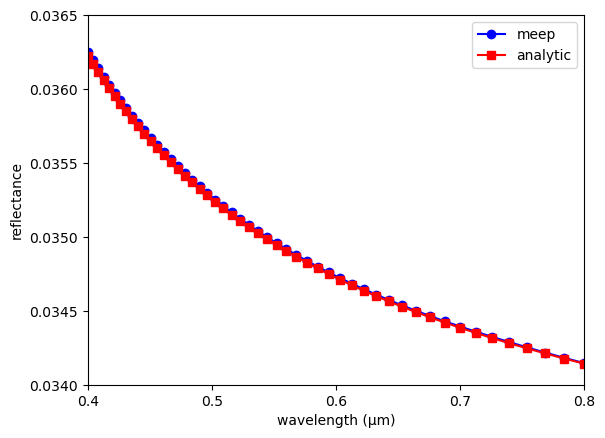

In [12]:
freqs = mp.get_flux_freqs(refl)
wvls = np.divide(1, freqs)

eps_quartz = (
    lambda l: 1
    + 0.6961663 * math.pow(l, 2) / (pow(l, 2) - pow(0.0684043, 2))
    + 0.4079426 * pow(l, 2) / (pow(l, 2) - pow(0.1162414, 2))
    + 0.8974794 * pow(l, 2) / (pow(l, 2) - pow(9.896161, 2))
)
R_fresnel = lambda l: math.pow(
    math.fabs(1 - math.sqrt(eps_quartz(l))) / (1 + math.sqrt(eps_quartz(l))), 2
)
R_analytic = [R_fresnel(i) for i in wvls]

plt.figure()
plt.plot(wvls, R_meep, "bo-", label="meep")
plt.plot(wvls, R_analytic, "rs-", label="analytic")
plt.xlabel("wavelength (μm)")
plt.ylabel("reflectance")
plt.axis([0.4, 0.8, 0.0340, 0.0365])
plt.xticks([t for t in np.arange(0.4, 0.9, 0.1)])
plt.legend(loc="upper right")
plt.show()

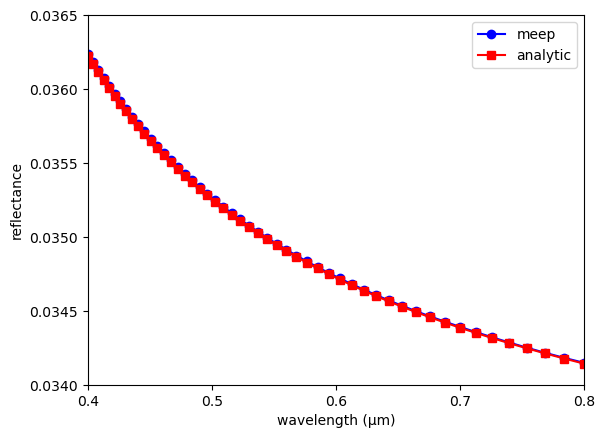

In [14]:
freqs = mp.get_flux_freqs(refl)
wvls = np.divide(1, freqs)

eps_quartz = (
    lambda l: 1
    + 0.6961663 * math.pow(l, 2) / (pow(l, 2) - pow(0.0684043, 2))
    + 0.4079426 * pow(l, 2) / (pow(l, 2) - pow(0.1162414, 2))
    + 0.8974794 * pow(l, 2) / (pow(l, 2) - pow(9.896161, 2))
)
R_fresnel = lambda l: math.pow(
    math.fabs(1 - math.sqrt(eps_quartz(l))) / (1 + math.sqrt(eps_quartz(l))), 2
)
R_analytic = [R_fresnel(i) for i in wvls]

plt.figure()
plt.plot(wvls, R_meep, "bo-", label="meep")
plt.plot(wvls, R_analytic, "rs-", label="analytic")
plt.xlabel("wavelength (μm)")
plt.ylabel("reflectance")
plt.axis([0.4, 0.8, 0.0340, 0.0365])
plt.xticks([t for t in np.arange(0.4, 0.9, 0.1)])
plt.legend(loc="upper right")
plt.show()

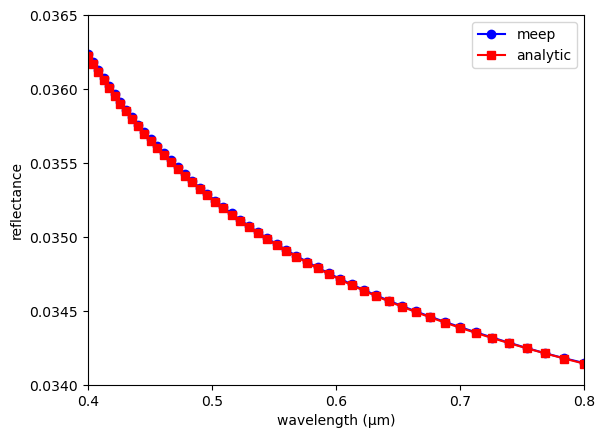

In [16]:
freqs = mp.get_flux_freqs(refl)
wvls = np.divide(1, freqs)

eps_quartz = (
    lambda l: 1
    + 0.6961663 * math.pow(l, 2) / (pow(l, 2) - pow(0.0684043, 2))
    + 0.4079426 * pow(l, 2) / (pow(l, 2) - pow(0.1162414, 2))
    + 0.8974794 * pow(l, 2) / (pow(l, 2) - pow(9.896161, 2))
)
R_fresnel = lambda l: math.pow(
    math.fabs(1 - math.sqrt(eps_quartz(l))) / (1 + math.sqrt(eps_quartz(l))), 2
)
R_analytic = [R_fresnel(i) for i in wvls]

plt.figure()
plt.plot(wvls, R_meep, "bo-", label="meep")
plt.plot(wvls, R_analytic, "rs-", label="analytic")
plt.xlabel("wavelength (μm)")
plt.ylabel("reflectance")
plt.axis([0.4, 0.8, 0.0340, 0.0365])
plt.xticks([t for t in np.arange(0.4, 0.9, 0.1)])
plt.legend(loc="upper right")
plt.show()

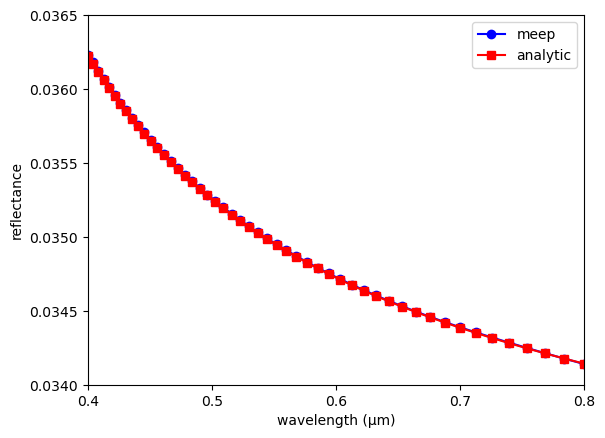

In [18]:
freqs = mp.get_flux_freqs(refl)
wvls = np.divide(1, freqs)

eps_quartz = (
    lambda l: 1
    + 0.6961663 * math.pow(l, 2) / (pow(l, 2) - pow(0.0684043, 2))
    + 0.4079426 * pow(l, 2) / (pow(l, 2) - pow(0.1162414, 2))
    + 0.8974794 * pow(l, 2) / (pow(l, 2) - pow(9.896161, 2))
)
R_fresnel = lambda l: math.pow(
    math.fabs(1 - math.sqrt(eps_quartz(l))) / (1 + math.sqrt(eps_quartz(l))), 2
)
R_analytic = [R_fresnel(i) for i in wvls]

plt.figure()
plt.plot(wvls, R_meep, "bo-", label="meep")
plt.plot(wvls, R_analytic, "rs-", label="analytic")
plt.xlabel("wavelength (μm)")
plt.ylabel("reflectance")
plt.axis([0.4, 0.8, 0.0340, 0.0365])
plt.xticks([t for t in np.arange(0.4, 0.9, 0.1)])
plt.legend(loc="upper right")
plt.show()